In [ ]:
!pip install pytorch_lightning
!pip install torch_lr_finder
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.8/722.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.7/596.7 kB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torch.optim as optim
import lightning.pytorch as pl
from lightning.pytorch.tuner import Tuner

# import pytorch_lightning as pl
from tqdm import tqdm
from yolov3 import YOLOv3
from loss import YoloLoss
from utils import LearningRateFinder
# Create your config module or import it from the existing config.py file.
import config
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from main_yolov3_lightening import YOLOv3Lightning

In [ ]:
from google.colab import drive
import zipfile
drive.mount('/content/gdrive')
zip_file_path = '/content/gdrive/My Drive/archive (2).zip'
extract_path = '/content'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/gdrive


In [ ]:
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor
from callbacks import PlotTestExamplesCallback, MAPCallback, CheckClassAccuracyCallback

CHECKPOINT_PATH = "checkpoints/"
# Initialize the model
model = YOLOv3Lightning()

# Define the callbacks
callbacks = [ModelCheckpoint(dirpath=CHECKPOINT_PATH,verbose=True,),
                              PlotTestExamplesCallback(every_n_epochs=10),
                              CheckClassAccuracyCallback(train_every_n_epochs=1, test_every_n_epochs=10),
                              MAPCallback(every_n_epochs=10),
                              LearningRateMonitor()]

# Instantiate the Trainer with callbacks
trainer = pl.Trainer(
    precision=16,
    max_epochs=40,
    callbacks=callbacks
)

/usr/local/lib/python3.10/dist-packages/lightning/fabric/connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
INFO: LR finder stopped early after 96 steps due to diverging loss.
INFO:lightning.pytorch.tuner.lr_finder:LR finder stopped early after 96 steps due to diverging loss.
INFO: Learning rate set to 0.01
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.01
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_0e151049-3e95-4705-8fa4-75c11710fd2a.ckpt
INFO:pytorch_lightning.utilities.rank_

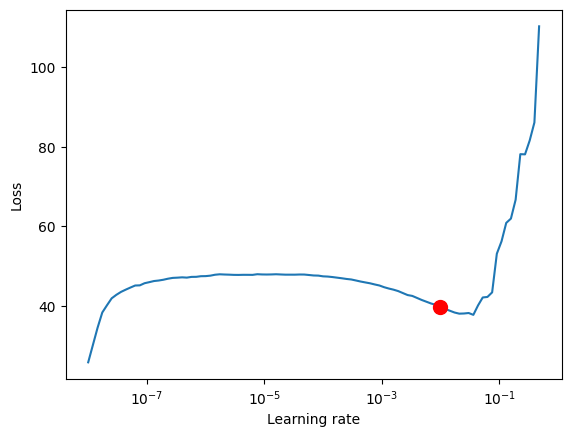

In [ ]:
# Create an instance of LearningRateFinder
lr_finder = LearningRateFinder(trainer, model)

# Find and set the learning rate
lr_finder.find_and_set_learning_rate()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name    | Type     | Params
-------------------------------------
0 | model   | YOLOv3   | 61.6 M
1 | loss_fn | YoloLoss | 0     
-------------------------------------
61.6 M    Trainable params
0         Non-trainable params
61.6 M    Total params
246.506   Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name    | Type     | Params
-------------------------------------
0 | model   | YOLOv3   | 61.6 M
1 | loss_fn | YoloLoss | 0     
-------------------------------------
61.6 M    Trainable params
0         Non-trainable params
61.6 M    Total params
246.506   Total estimated model params siz

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 0
Loss: 19.502483367919922
Class Accuracy: 34.179066%
No Object Accuracy: 99.917130%
Object Accuracy: 0.204623%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 1
Loss: 12.445760726928711
Class Accuracy: 36.521210%
No Object Accuracy: 99.578812%
Object Accuracy: 8.541598%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 2
Loss: 11.295914649963379
Class Accuracy: 40.674385%
No Object Accuracy: 96.882538%
Object Accuracy: 32.231983%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 3
Loss: 10.414724349975586
Class Accuracy: 44.304558%
No Object Accuracy: 97.067505%
Object Accuracy: 43.169777%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 4
Loss: 9.832324981689453
Class Accuracy: 40.855396%
No Object Accuracy: 96.998962%
Object Accuracy: 40.777958%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 5
Loss: 10.241968154907227
Class Accuracy: 44.617996%
No Object Accuracy: 97.478615%
Object Accuracy: 45.524731%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 6
Loss: 9.115326881408691
Class Accuracy: 46.167873%
No Object Accuracy: 97.849052%
Object Accuracy: 46.020443%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 7
Loss: 8.675603866577148
Class Accuracy: 48.821156%
No Object Accuracy: 98.533897%
Object Accuracy: 44.024731%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 8
Loss: 8.37851333618164
Class Accuracy: 49.815704%
No Object Accuracy: 96.986244%
Object Accuracy: 53.893353%


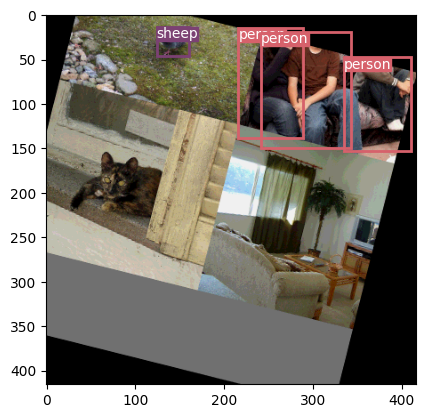

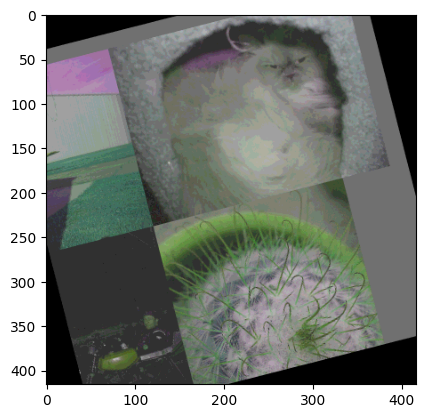

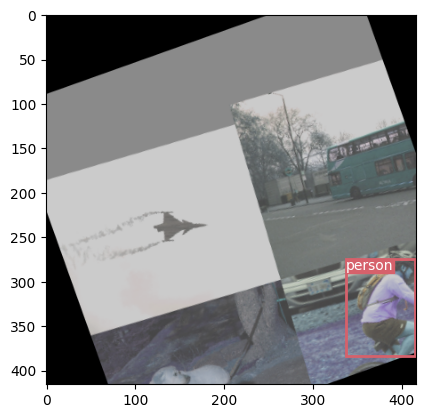

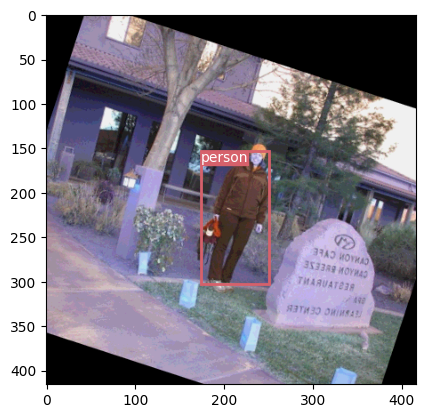

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 9
Loss: 8.108885765075684
Class Accuracy: 54.863953%
No Object Accuracy: 97.961784%
Object Accuracy: 54.287582%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 63.718479%
No Object Accuracy: 98.858788%
Object Accuracy: 43.344418%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP:  0.08291830122470856


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 10
Loss: 7.821064472198486
Class Accuracy: 56.646358%
No Object Accuracy: 96.669060%
Object Accuracy: 63.342415%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 11
Loss: 7.634126663208008
Class Accuracy: 55.954838%
No Object Accuracy: 97.647102%
Object Accuracy: 58.734524%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 12
Loss: 7.385874271392822
Class Accuracy: 57.595516%
No Object Accuracy: 98.339325%
Object Accuracy: 52.240688%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 13
Loss: 7.174068927764893
Class Accuracy: 61.492401%
No Object Accuracy: 97.944954%
Object Accuracy: 60.056599%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 14
Loss: 6.914626121520996
Class Accuracy: 56.621807%
No Object Accuracy: 97.423264%
Object Accuracy: 61.451046%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 15
Loss: 6.7478108406066895
Class Accuracy: 63.351494%
No Object Accuracy: 97.301903%
Object Accuracy: 65.405815%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 16
Loss: 6.573994159698486
Class Accuracy: 65.826271%
No Object Accuracy: 97.828804%
Object Accuracy: 65.816368%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 17
Loss: 6.332271099090576
Class Accuracy: 63.813747%
No Object Accuracy: 96.895027%
Object Accuracy: 70.767799%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 18
Loss: 6.208128452301025
Class Accuracy: 68.319359%
No Object Accuracy: 97.990685%
Object Accuracy: 65.444275%


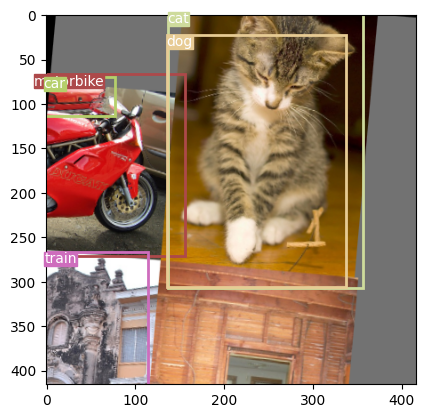

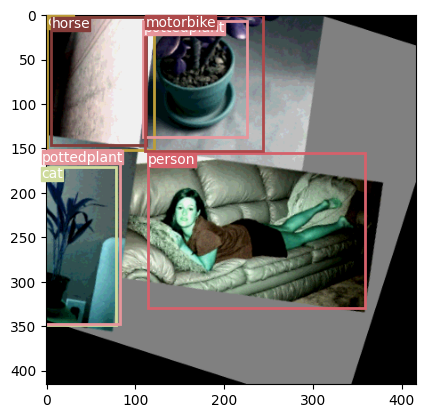

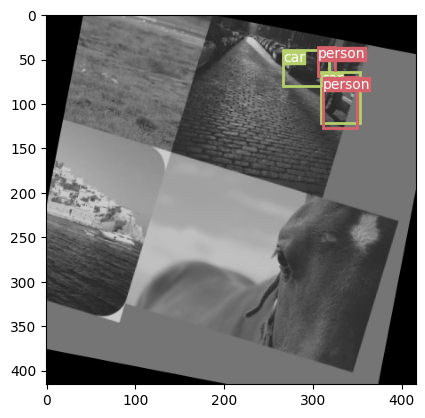

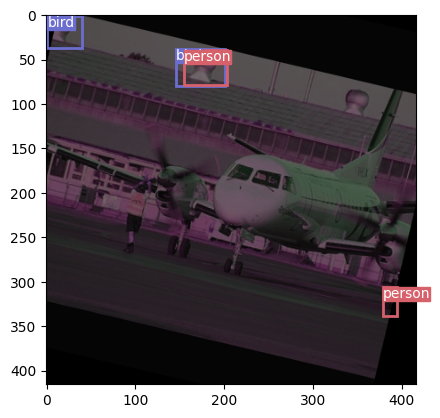

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 19
Loss: 6.101820468902588
Class Accuracy: 67.979492%
No Object Accuracy: 97.375778%
Object Accuracy: 70.518890%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 76.328621%
No Object Accuracy: 98.139610%
Object Accuracy: 66.558609%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP:  0.19808202981948853


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 20
Loss: 5.8953938484191895
Class Accuracy: 68.031242%
No Object Accuracy: 97.821587%
Object Accuracy: 64.234901%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 21
Loss: 5.769168853759766
Class Accuracy: 70.401154%
No Object Accuracy: 97.671303%
Object Accuracy: 69.599106%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 22
Loss: 5.630765438079834
Class Accuracy: 72.520157%
No Object Accuracy: 97.842178%
Object Accuracy: 70.426537%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 23
Loss: 5.497457504272461
Class Accuracy: 74.100502%
No Object Accuracy: 97.840652%
Object Accuracy: 70.981270%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 24
Loss: 5.3333024978637695
Class Accuracy: 73.861275%
No Object Accuracy: 97.801506%
Object Accuracy: 72.214470%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 25
Loss: 5.241975784301758
Class Accuracy: 73.311028%
No Object Accuracy: 97.917259%
Object Accuracy: 72.198837%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 26
Loss: 5.088991641998291
Class Accuracy: 75.655518%
No Object Accuracy: 97.980888%
Object Accuracy: 72.182480%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 27
Loss: 4.980171203613281
Class Accuracy: 76.962952%
No Object Accuracy: 97.774742%
Object Accuracy: 74.573509%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 28
Loss: 4.905660152435303
Class Accuracy: 77.454941%
No Object Accuracy: 97.627190%
Object Accuracy: 76.094421%


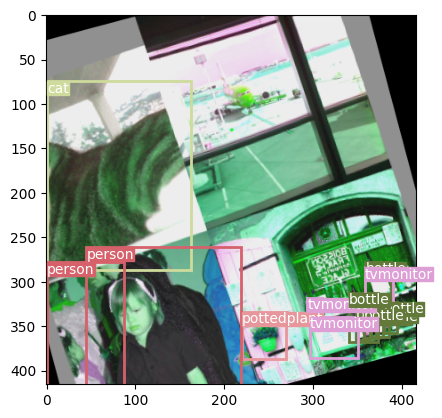

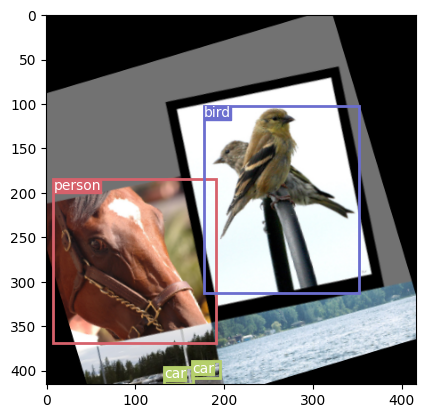

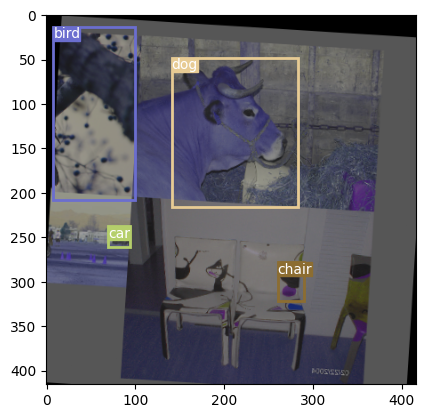

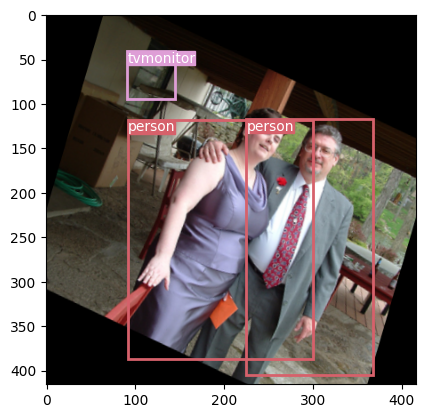

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 29
Loss: 4.744002342224121
Class Accuracy: 78.818855%
No Object Accuracy: 97.447975%
Object Accuracy: 77.391937%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 85.397621%
No Object Accuracy: 98.437660%
Object Accuracy: 71.978394%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP:  0.36952903866767883


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 30
Loss: 4.677617073059082
Class Accuracy: 79.815552%
No Object Accuracy: 97.882866%
Object Accuracy: 76.136093%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 31
Loss: 4.5202250480651855
Class Accuracy: 80.811272%
No Object Accuracy: 97.889565%
Object Accuracy: 75.987869%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 32
Loss: 4.41505241394043
Class Accuracy: 81.102905%
No Object Accuracy: 97.848663%
Object Accuracy: 77.105019%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 33
Loss: 4.3231282234191895
Class Accuracy: 81.923737%
No Object Accuracy: 97.869797%
Object Accuracy: 77.460396%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 34
Loss: 4.202864170074463
Class Accuracy: 82.886543%
No Object Accuracy: 97.863792%
Object Accuracy: 78.154495%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 35
Loss: 4.086621284484863
Class Accuracy: 82.883827%
No Object Accuracy: 97.916573%
Object Accuracy: 77.908768%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 36
Loss: 3.994511842727661
Class Accuracy: 84.447655%
No Object Accuracy: 97.978493%
Object Accuracy: 79.005524%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 37
Loss: 3.8890902996063232
Class Accuracy: 84.914017%
No Object Accuracy: 97.986221%
Object Accuracy: 78.855965%


  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 38
Loss: 3.815894365310669
Class Accuracy: 85.592529%
No Object Accuracy: 98.074226%
Object Accuracy: 78.947586%


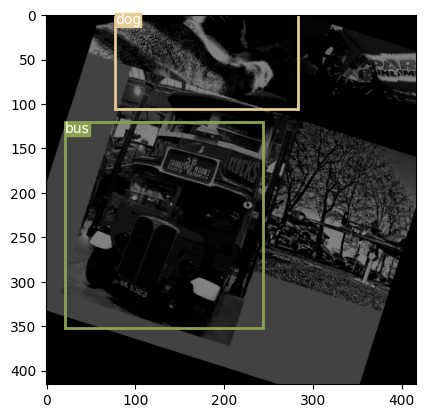

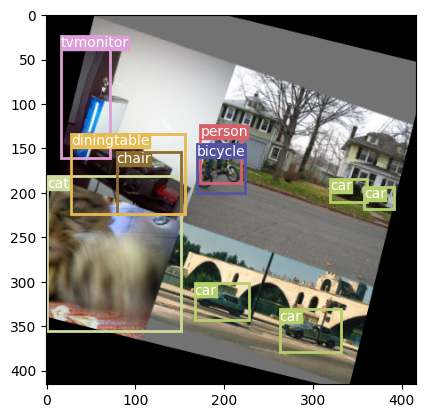

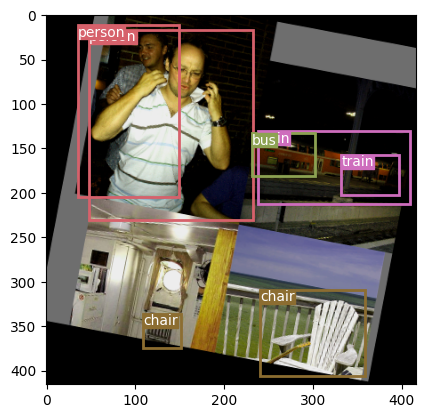

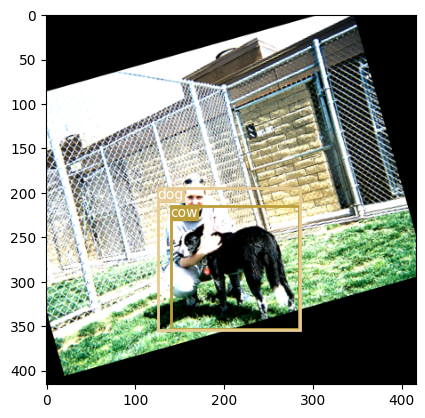

  0%|          | 0/1035 [00:00<?, ?it/s]

Train Metrics
Epoch: 39
Loss: 3.7511277198791504
Class Accuracy: 85.762337%
No Object Accuracy: 98.037003%
Object Accuracy: 79.472855%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 89.573288%
No Object Accuracy: 98.923180%
Object Accuracy: 72.610138%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP:  0.4797763228416443


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=40` reached.


In [ ]:
trainer.fit(model)

In [ ]:
trainer.test()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:148: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/checkpoints/epoch=39-step=41400.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/checkpoints/epoch=39-step=41400.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_loss_epoch      │     3.58564829826355      │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_epoch': 3.58564829826355}]

In [ ]:
# # # Save the model
torch.save(model.state_dict(), "yolov3_model_without_75_mosaic.pth")

In [ ]:
import shutil
drive_path = '/content/gdrive/My Drive/yolov3_model_without_75_mosaic.pth'
local_path = 'yolov3_model_without_75_mosaic.pth'  # The path where you saved the model within Colab

shutil.copyfile(local_path, drive_path)

'/content/gdrive/My Drive/yolov3_model_without_75_mosaic.pth'

In [ ]:
!cp yolov3_model_without_75_mosaic.pth gdrive/MyDrive/Personal/